# 03 — Exploratory Data Analysis (EDA)

Loads the processed dataset and creates a few diagnostic plots.

In [1]:
# Notebook setup
import os, sys
from pathlib import Path

# Add project root to PYTHONPATH
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

print('Project root:', PROJECT_ROOT)


Project root: /mnt/data/churn_fix/churn-reduction-end-to-end


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from src.config import Config

cfg = Config()
processed_path = PROJECT_ROOT / cfg.PROCESSED_DIR / cfg.PROCESSED_FILENAME
print('Processed dataset:', processed_path)
df = pd.read_csv(processed_path)
df.head()

Processed dataset: /mnt/data/churn_fix/churn-reduction-end-to-end/data/processed/processed_dataset.csv


,customer_id,age,country,device,acquisition_channel,plan,billing_cycle,payment_method,base_price,total_discount_pct,...,signup_dayofweek,tenure_bucket,engagement_index,support_friction,payment_risk,discount_intensity,low_engagement_flag,high_support_flag,log_monthly_fee,log_tenure
0,1,19,CA,Mobile,Affiliate,Standard,Annual,Debit Card,13.99,0.190818,...,5,24+,0.358167,0.060556,0.000000,0.190818,0,0,2.511224,4.025352
1,2,55,SE,Mobile,Referral,Basic,Annual,PayPal,9.99,0.259823,...,3,12-23,0.494667,0.163333,0.333333,0.259823,0,0,2.127041,2.708050
2,3,29,IT,Mobile,Affiliate,Standard,Monthly,Debit Card,13.99,0.000000,...,2,12-23,0.328167,0.232222,0.333333,0.000000,1,0,2.707383,3.091042
3,4,54,UK,Mobile,Email,Standard,Monthly,Credit Card,13.99,0.000000,...,0,24+,0.560000,0.103889,0.666667,0.000000,0,0,2.707383,3.555348
4,5,47,US,SmartTV,Social,Standard,Monthly,Debit Card,13.99,0.150000,...,3,24+,0.382833,0.095556,0.333333,0.150000,0,0,2.556452,3.555348


In [3]:
df.shape, df['churned'].mean()

((20000, 34), 0.71775)

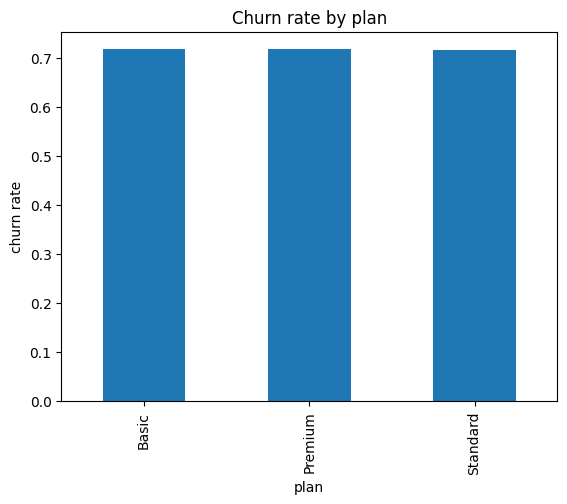

In [4]:
# Churn by plan
churn_by_plan = df.groupby('plan')['churned'].mean().sort_values(ascending=False)
churn_by_plan.plot(kind='bar')
plt.title('Churn rate by plan')
plt.xlabel('plan')
plt.ylabel('churn rate')
plt.show()

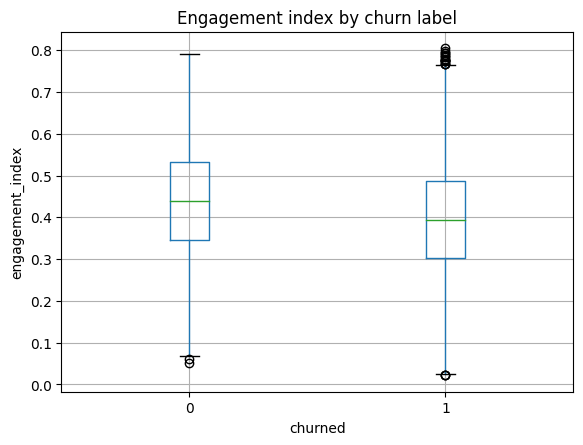

In [5]:
# Engagement index vs churn (if feature exists)
if 'engagement_index' in df.columns:
    df.boxplot(column='engagement_index', by='churned')
    plt.suptitle('')
    plt.title('Engagement index by churn label')
    plt.xlabel('churned')
    plt.ylabel('engagement_index')
    plt.show()
else:
    print('Feature engagement_index not found — run main.py first to generate processed dataset')